# SVM Toy example

Disclaimer: The following example was created only for my understanding. If you have any feedback please feel free to reach out

In [1]:
from matplotlib import gridspec
from matplotlib import pyplot
from mlxtend import plotting
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn import svm
import util

## Data generation

In [2]:
X, y = datasets.make_moons(n_samples=100, random_state=123, noise=0.08)

Text(0, 0.5, 'Feature 2')

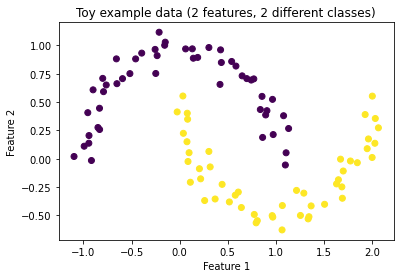

In [3]:
pyplot.scatter(X[:,0], X[:,1], c=y)
pyplot.title('Toy example data (2 features, 2 different classes)')
pyplot.xlabel('Feature 1')
pyplot.ylabel('Feature 2')

## Train / Test data

In [4]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.20)

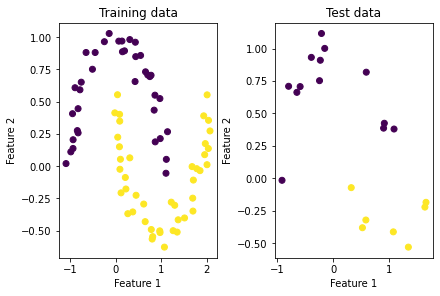

In [5]:
figure = pyplot.figure(constrained_layout=True)
grid_specification = gridspec.GridSpec(1, 2, figure=figure)
left_plot = figure.add_subplot(grid_specification[0, 0])
right_plot = figure.add_subplot(grid_specification[0, 1])

left_plot.set_title('Training data')
left_plot.set_xlabel('Feature 1')
left_plot.set_ylabel('Feature 2')
left_plot.scatter(x_train[:,0], x_train[:,1], c=y_train)

right_plot.set_title('Test data')
right_plot.set_xlabel('Feature 1')
right_plot.set_ylabel('Feature 2')
right_plot.scatter(x_test[:,0], x_test[:,1], c=y_test)

## SVC Models

### Different kernels

In [6]:
kernels = ['linear', 'rbf', 'sigmoid']
svc_models = [svm.SVC(C=0.5, kernel=kernel, gamma=1/2) for kernel in kernels]
titles = [f'SVC with {kernel} kernel' for kernel in kernels]

for model in svc_models:
    model.fit(x_train, y_train)

accuracies = [metrics.accuracy_score(y_test, model.predict(x_test)) for model in svc_models]

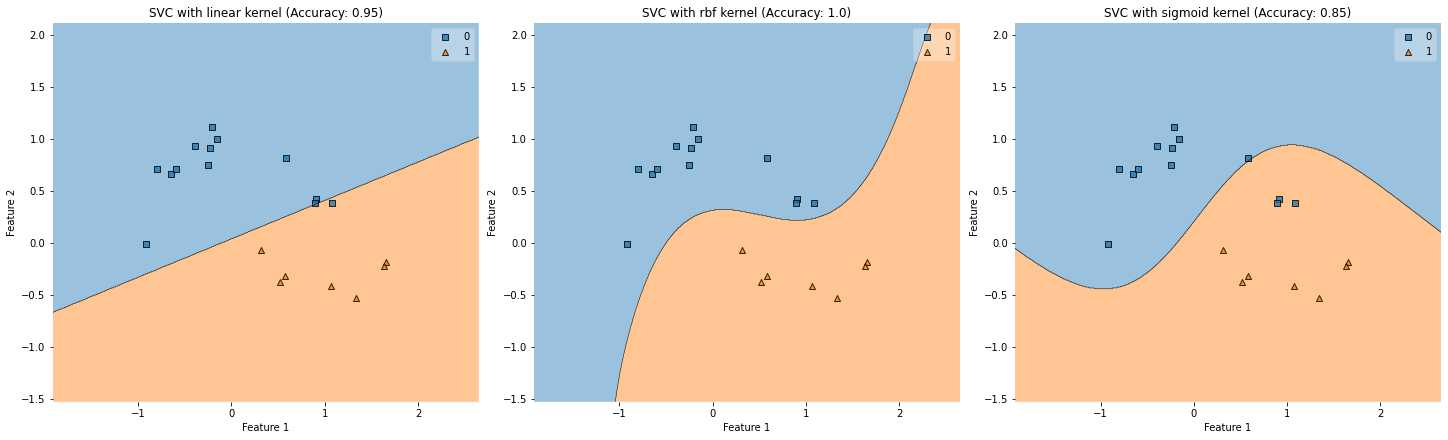

In [7]:
util.plot_multiple_predictions(svc_models, titles, accuracies, x_test, y_test)

### Different C values

In [8]:
c_values = [0.1, 1, 10, 100, 1000, 10000]
svc_models = [svm.SVC(C=c, kernel='rbf', gamma=1/2) for c in c_values]
titles = [f'SVC with C of {c}' for c in c_values]

for model in svc_models:
    model.fit(x_train, y_train)

accuracies = [metrics.accuracy_score(y_test, model.predict(x_test)) for model in svc_models]

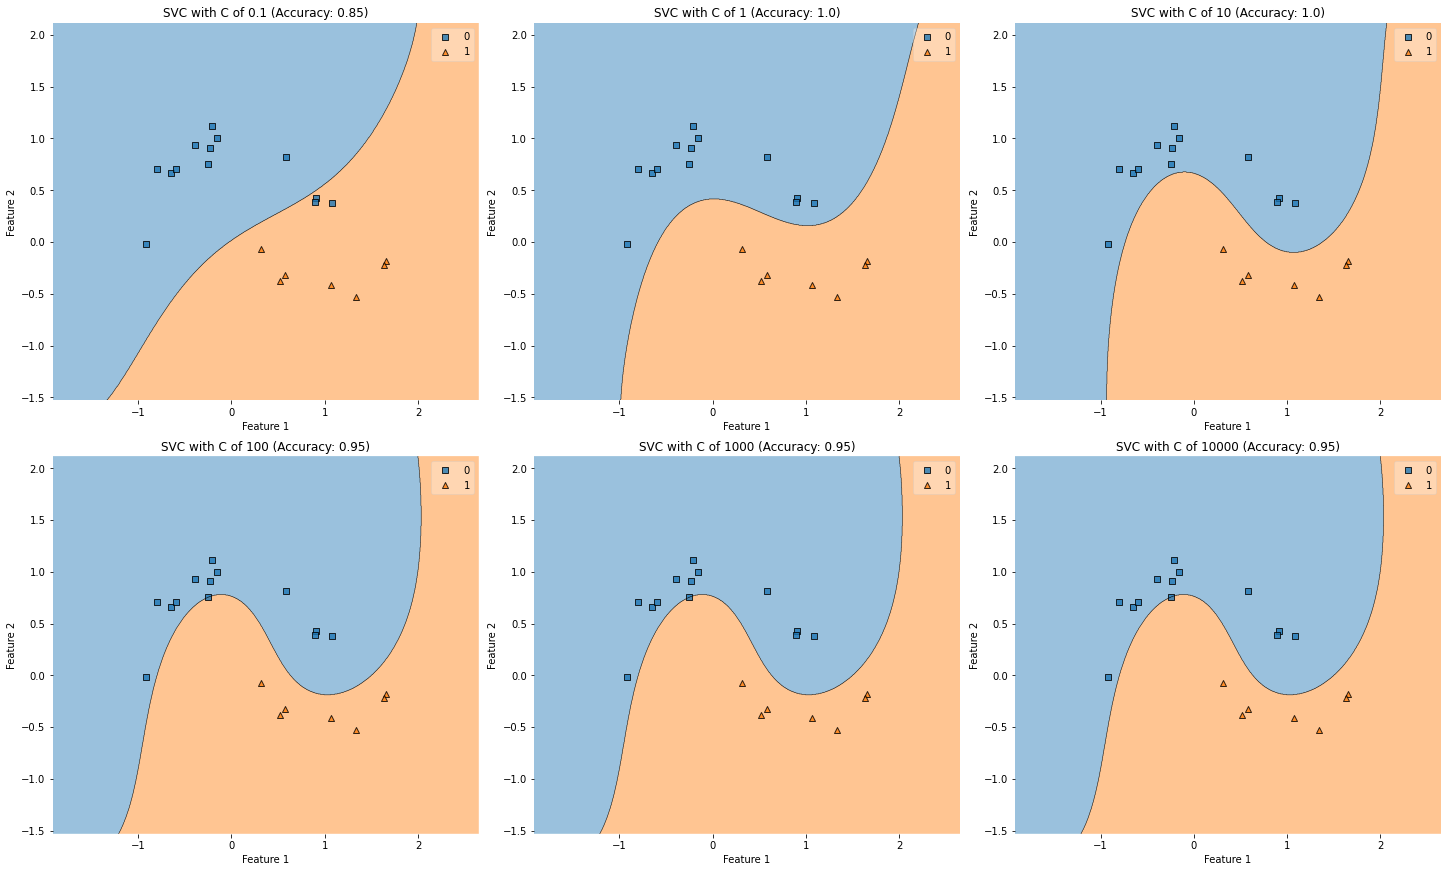

In [9]:
util.plot_multiple_predictions(svc_models, titles, accuracies, x_test, y_test)

### Different gamma values

In [10]:
gamma_values = [0.1, 0.5, 1, 10, 100, 1000]
svc_models = [svm.SVC(C=1, kernel='rbf', gamma=gamma) for gamma in gamma_values]
titles = [f'SVC with gamma of {gamma}' for gamma in gamma_values]

for model in svc_models:
    model.fit(x_train, y_train)

accuracies = [metrics.accuracy_score(y_test, model.predict(x_test)) for model in svc_models]

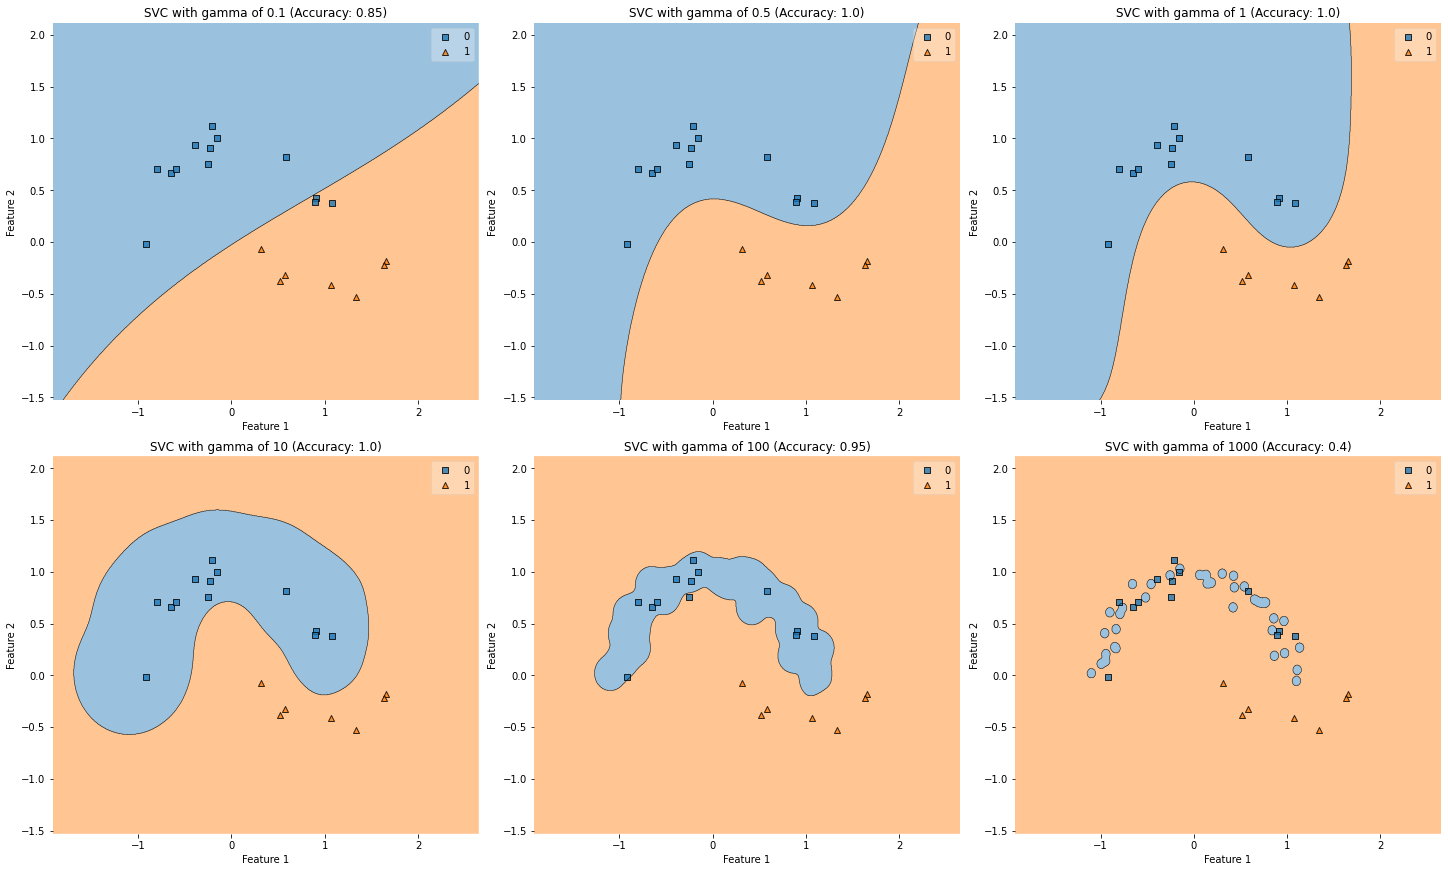

In [11]:
util.plot_multiple_predictions(svc_models, titles, accuracies, x_test, y_test)